In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
gs= pd.read_csv("C:/Users/Irish/Desktop/Informatique/Jupyter Notebook/MidTerm/Titanic/gender_submission.csv")
test= pd.read_csv("C:/Users/Irish/Desktop/Informatique/Jupyter Notebook/MidTerm/Titanic/test.csv")
train= pd.read_csv("C:/Users/Irish/Desktop/Informatique/Jupyter Notebook/MidTerm/Titanic/train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train["Minor"] = train["Age"].apply(lambda age: 1 if age < 18 else 0)
test["Minor"] = test["Age"].apply(lambda age: 1 if age < 18 else 0)

In [6]:
survived_by_sex = train.groupby(["Sex", "Survived"]).size()


men_survived = survived_by_sex[3]
men = men_survived + survived_by_sex[2]
women_survived = survived_by_sex[1]
women = women_survived + survived_by_sex[0]


print("Male = 1 & Femake = 0\n", survived_by_sex)
print("Percentage of men who survived:", "{:.0f}%".format((men_survived/men)*100))
print("Percentage of women who survived:", "{:.0f}%".format((women_survived/women)*100))

Male = 1 & Femake = 0
 Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64
Percentage of men who survived: 19%
Percentage of women who survived: 74%


In [7]:
survived_by_class = train.groupby(["Pclass", "Survived"]).size()

third_survived = survived_by_class.loc[(3, 1)]
third = men_survived + survived_by_class.loc[(3, 0)]
second_survived = survived_by_class.loc[(2, 1)]
second = men_survived + survived_by_class.loc[(2, 0)]
first_survived = survived_by_class.loc[(1, 1)]
first = women_survived + survived_by_class.loc[(1, 0)]


print(survived_by_class)
print("Percentage of third who survived:", "{:.0f}%".format((third_survived/third)*100))
print("Percentage of second who survived:", "{:.0f}%".format((second_survived/second)*100))
print("Percentage of first who survived:", "{:.0f}%".format((first_survived/first)*100))

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
Percentage of third who survived: 25%
Percentage of second who survived: 42%
Percentage of first who survived: 43%


In [8]:
survived_minors = train.groupby(["Minor", "Survived"]).size()

adults_survived = survived_minors.loc[(0, 1)]
adults = adults_survived + survived_minors.loc[(0, 0)]
minor_survived = survived_minors.loc[(1, 1)]
minors = minor_survived + survived_minors.loc[(1, 0)]

print(survived_by_class)
print("Percentage of adults who survived:", "{:.0f}%".format((adults_survived/adults)*100))
print("Percentage of minors who survived:", "{:.0f}%".format((minor_survived/minors)*100))

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
Percentage of adults who survived: 36%
Percentage of minors who survived: 54%


In [9]:
trainclean = train.drop(["Name","Ticket","SibSp","Parch","Embarked","Cabin", "PassengerId"],axis = 1)

testclean = test.drop(["Name","Ticket","SibSp","Parch","Embarked","Cabin", "PassengerId"],axis = 1)

trainclean["Sex"] = trainclean["Sex"].replace({"male": 1, "female": 0})
testclean["Sex"] = testclean["Sex"].replace({"male": 1, "female": 0})

In [10]:
trainclean['Age'].fillna(trainclean['Age'].median(), inplace=True)
trainclean['Fare'].fillna(trainclean['Fare'].median(), inplace=True)
testclean['Age'].fillna(testclean['Age'].median(), inplace=True)
testclean['Fare'].fillna(testclean['Fare'].median(), inplace=True)

In [11]:
num_cols = ["Survived", "Pclass","Sex", "Age", "Fare","Minor"]

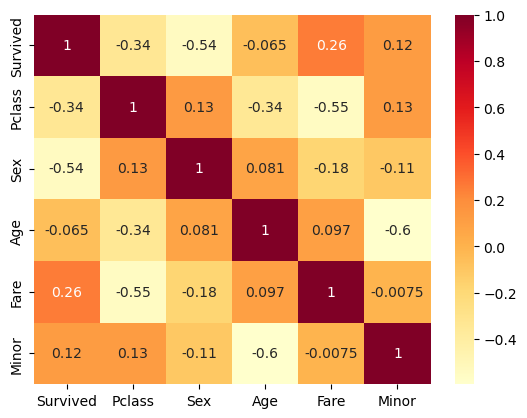

In [12]:
corr_matrix = trainclean[num_cols].corr()
sns.heatmap(corr_matrix, annot=True,cmap="YlOrRd")
plt.show()

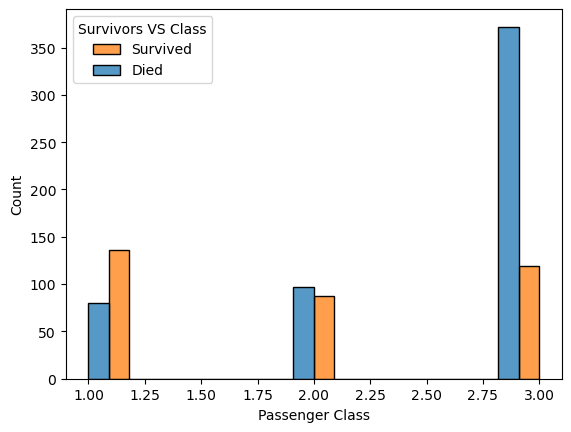

In [23]:
sns.histplot(data = train, x = 'Pclass', hue = 'Survived', multiple = 'dodge', legend=True)
plt.xlabel('Passenger Class')
plt.legend(title='Survivors VS Class', labels=['Survived', 'Died'])

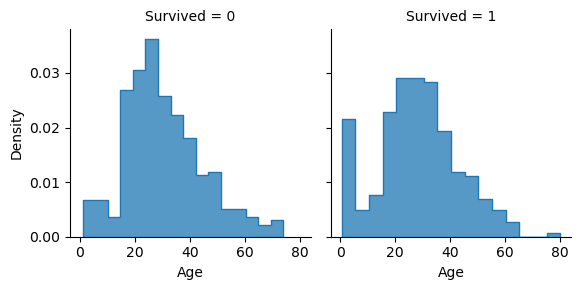

In [15]:
g = sns.FacetGrid(train, col="Survived")
g.map(sns.histplot, "Age", element="step", stat="density")

<Axes: xlabel='Fare', ylabel='Density'>

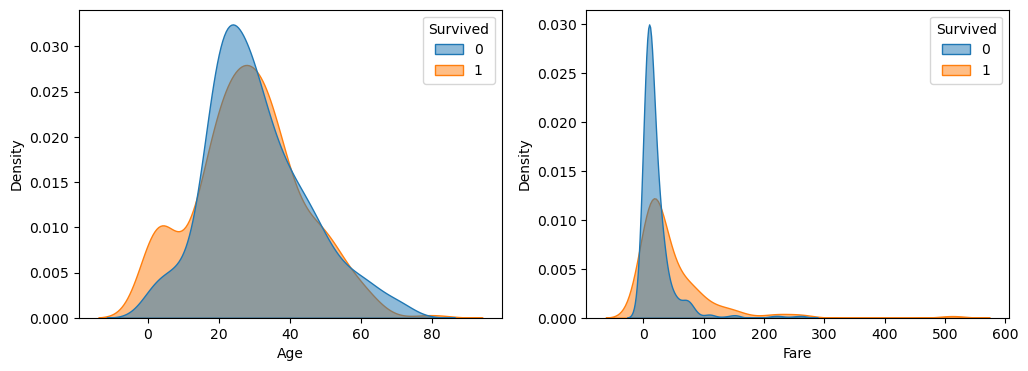

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.kdeplot(data=train, x="Age", hue="Survived", common_norm=False, fill=True, alpha=.5, ax=axs[0])
sns.kdeplot(data=train, x="Fare", hue="Survived", common_norm=False, fill=True, alpha=.5, ax=axs[1])

In [17]:
X_train = trainclean.drop(["Survived"],axis = 1)
y_train = trainclean["Survived"]

In [18]:
X_test = testclean
y_test =gs["Survived"]

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9617224880382775
Precision: 0.9473684210526315
Recall: 0.9473684210526315
F1-score: 0.9473684210526315
